In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_csv("movies_metabase_clean.csv")

In [26]:
df.head()

,id,title,original_title,status,release_date,company,revenue,budget,adult,belongs_to_collection,original_language,popularity,country,runtime,spoken_languages,tagline,video,vote_average,vote_count
0,862,Toy Story,Toy Story,Released,1995-10-30,Pixar Animation Studios,373554033.0,30000000,False,True,en,21.946943,US,81.0,1,NaN,False,7.7,5415.0
1,8844,Jumanji,Jumanji,Released,1995-12-15,TriStar Pictures,262797249.0,65000000,False,False,en,17.015539,US,104.0,2,Roll the dice and unleash the excitement!,False,6.9,2413.0
2,31357,Waiting to Exhale,Waiting to Exhale,Released,1995-12-22,Interscope Communications,81452156.0,16000000,False,False,en,3.859495,US,127.0,1,Friends are the people who let you be yourself...,False,6.1,34.0
3,11862,Father of the Bride Part II,Father of the Bride Part II,Released,1995-02-10,Twentieth Century Fox Film Corporation,76578911.0,0,False,True,en,8.387519,US,106.0,1,Just When His World Is Back To Normal... He's ...,False,5.7,173.0
4,949,Heat,Heat,Released,1995-12-15,Sandollar Productions,187436818.0,60000000,False,False,en,17.924927,US,170.0,2,A Los Angeles Crime Saga,False,7.7,1886.0


In [27]:
df.shape

(7397, 19)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3090B8B88>]],
      dtype=object)

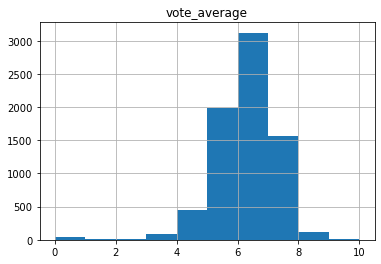

In [28]:
# 
df.hist(column='vote_average')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F30B27B908>]],
      dtype=object)

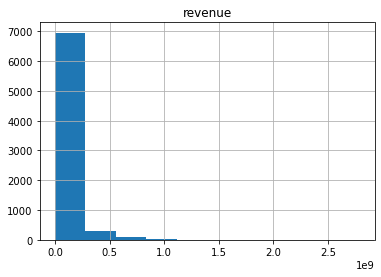

In [29]:
#
df.hist(column='revenue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F30B26D748>]],
      dtype=object)

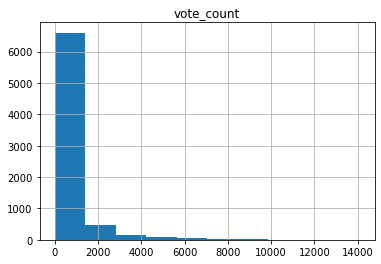

In [30]:
#
df.hist(column='vote_count')

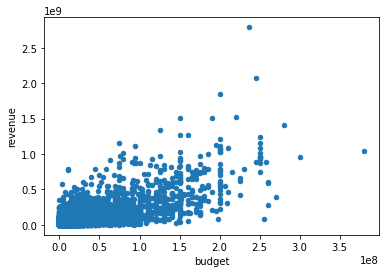

In [31]:
# budget vs gross
df.plot.scatter(x='budget', y='revenue')

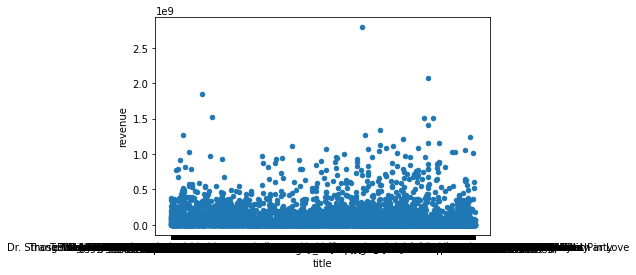

In [32]:
# title year vs gross
df.plot.scatter(x='title', y='revenue')
plt.show(15)

revenue         1.000000
vote_count      0.812022
runtime         0.103917
vote_average    0.083868
Name: revenue, dtype: float64

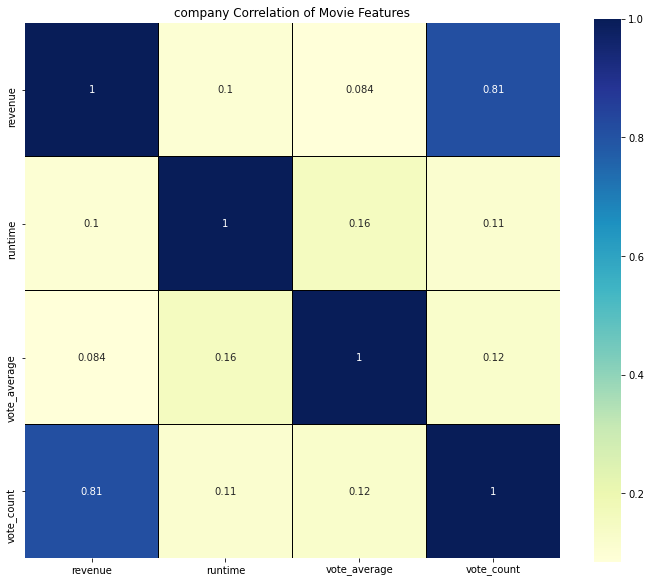

In [18]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('company Correlation of Movie Features')

# Draw the heatmap using seaborn
sns.heatmap(df.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

#  The heat map depicting a diagonal coordination indicated there may be a correlation in the data

#  To show corellation polarity values with the 'gross'
df.corr()['revenue'].sort_values(ascending=False)  


In [24]:
# get number of movie group by release year
release = df.groupby('release_date').size()
# get index number of movie group by release year
release_idx = release.index